In [1]:
!pip install -q kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:31<00:00, 29.9MB/s]
100% 2.29G/2.29G [00:31<00:00, 79.0MB/s]


In [3]:
from zipfile import ZipFile
file_name='/content/chest-xray-pneumonia.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()

In [4]:
import keras 
from keras.models import * 
from keras.layers import * 
from keras.preprocessing import image
import PIL
from keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator( 
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        r'/content/chest_xray/train',
        color_mode = 'grayscale',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary', shuffle=True)

test_set = test_datagen.flow_from_directory(
        r'/content/chest_xray/test',
        color_mode = 'grayscale',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary', shuffle=True)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [9]:
# AlexNet
model = Sequential()

model.add(Conv2D(96, kernel_size=(11, 11), strides=(4,4), padding='valid', activation='relu', input_shape=(224,224,1)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(384, kernel_size=(3, 3), strides=(1,1), activation='relu', padding='same'))
model.add(Conv2D(384, kernel_size=(3, 3), strides=(1,1), activation='relu', padding='same'))
model.add(Conv2D(256, kernel_size=(3, 3), strides=(1,1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Dropout(0.5))


#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer="adam", metrics=['accuracy'])


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 54, 54, 96)        11712     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 384)       885120    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 384)       1327488   
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 256)      

In [10]:
#We'll try to train with 100 Epochs
results=model.fit( 
    training_set,
    batch_size=32,  
    epochs=30,
    validation_data=test_set,
    validation_steps=1
)

Epoch 1/30
163/163 [==============================] - 61s 364ms/step - loss: 0.6576 - accuracy: 0.7322 - val_loss: 0.7644 - val_accuracy: 0.5625
Epoch 2/30
163/163 [==============================] - 59s 364ms/step - loss: 0.4920 - accuracy: 0.7699 - val_loss: 0.3492 - val_accuracy: 0.8438
Epoch 3/30
163/163 [==============================] - 59s 364ms/step - loss: 0.3234 - accuracy: 0.8516 - val_loss: 0.2630 - val_accuracy: 0.8750
Epoch 4/30
163/163 [==============================] - 59s 363ms/step - loss: 0.2931 - accuracy: 0.8838 - val_loss: 0.3741 - val_accuracy: 0.9062
Epoch 5/30
163/163 [==============================] - 60s 365ms/step - loss: 0.2408 - accuracy: 0.8990 - val_loss: 0.1835 - val_accuracy: 0.9062
Epoch 6/30
163/163 [==============================] - 60s 365ms/step - loss: 0.2255 - accuracy: 0.9091 - val_loss: 0.3320 - val_accuracy: 0.9062
Epoch 7/30
163/163 [==============================] - 59s 363ms/step - loss: 0.2101 - accuracy: 0.9164 - val_loss: 0.2601 - val_ac

Text(0.5, 0, 'epoch')

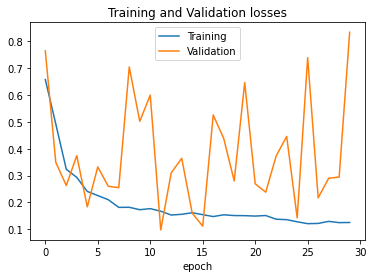

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

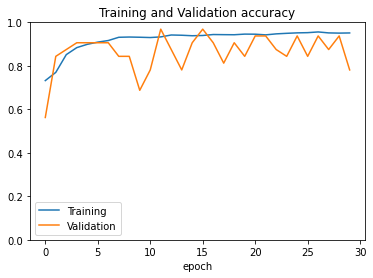

In [12]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')
plt.ylim(0, 1);